In [2]:
import numpy as np
import pandas as pd
import ssl
import matplotlib.pyplot as plt

ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
def load_data():
    data = pd.read_csv("https://raw.githubusercontent.com/lakigigar/Caltech-CS155-2021/main/projects/project2/data/data.txt",  encoding='utf-8',sep='\t',lineterminator='\n',names=['USER','MOVIE','RATING'])
    movies = pd.read_csv("https://raw.githubusercontent.com/lakigigar/Caltech-CS155-2021/main/projects/project2/data/movies.txt", encoding='latin-1',sep='\t')
    movies.columns=['MOVIE_ID','TITLE','UNKNOWN','ACTION','ADVENTURE','ANIMATION','CHILDREN','COMEDY','CRIME','DOCUMENTARY','DRAMA','FANTASY','FILM-NOIR','HORROR','MUSICAL','MYSTERY','ROMANCE','SCI-FI','THRILLER','WAR','WESTERN']
    return data,movies

In [4]:
data,movies = load_data()
print(data)
print(movies)

       USER  MOVIE  RATING
0       196    242       3
1       186    302       3
2        22    377       1
3       244     51       2
4       166    346       1
...     ...    ...     ...
99995   880    476       3
99996   716    204       5
99997   276   1090       1
99998    13    225       2
99999    12    203       3

[100000 rows x 3 columns]
      MOVIE_ID                                              TITLE  UNKNOWN  \
0            2                                   GoldenEye (1995)        0   
1            3                                  Four Rooms (1995)        0   
2            4                                  Get Shorty (1995)        0   
3            5                                     Copycat (1995)        0   
4            6  Shanghai Triad (Yao a yao yao dao waipo qiao) ...        0   
...        ...                                                ...      ...   
1676      1678                                  Mat' i syn (1997)        0   
1677      1679           

([<matplotlib.axis.XTick at 0x7f89bff35d90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

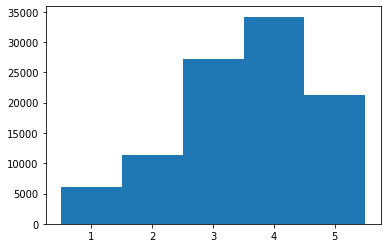

In [6]:
#Visualize all ratings
plt.figure()
plt.hist(data['RATING'].to_numpy(),bins=[0.5,1.5,2.5,3.5,4.5,5.5],align='mid')
plt.xticks([1,2,3,4,5])